In [1]:
import numpy as np
import torch
import torch.nn as nn
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
trainX = np.load('mnist_trainX.npy')
trainY = np.load('mnist_trainY.npy')
testX=   np.load('mnist_testX.npy')
testY=   np.load('mnist_testY.npy')

In [3]:
# print(trainX)
# print(trainY)

In [4]:
trainX.shape

(60000, 28, 28)

In [5]:
trainY.shape

(60000,)

In [6]:
# print(testX.shape)
# print(testY.shape)

In [7]:
trainX = torch.Tensor(trainX)
trainY = torch.Tensor(trainY).long()
testX=   torch.Tensor(testX)
testY=   torch.Tensor(testY)

In [8]:
trainX.size()

torch.Size([60000, 28, 28])

In [9]:
class FFN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid1 = nn.Sigmoid()
        
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.sigmoid2 = nn.Sigmoid()
        
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.sigmoid3 = nn.Sigmoid()
        
#         self.fc4 = nn.Linear(hidden_size, hidden_size)
#         self.sigmoid4 = nn.Sigmoid()
        
        self.fc4 = nn.Linear(hidden_size, output_size)

        
        
    def forward(self, x):
        z1 = self.fc1(x)
        a1 = self.sigmoid1(z1)
        z2 = self.fc2(a1)
        a2 = self.sigmoid2(z2)
        z3 = self.fc3(a2)
        a3 = self.sigmoid3(z3)
        z4=  self.fc4(a3)
#         a4 = self.sigmoid3(z4)
#         z5=  self.fc5(a4)
        
        return z4

In [10]:
model = FFN(784, 300, 10)
model.cuda()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
num_of_epochs = 200

In [12]:
batch_size = 100
for cur_epoch in range(num_of_epochs):
    total_loss = 0
    for sptr in range(0, trainX.shape[0], batch_size):
        eptr = sptr + batch_size
        curX = trainX[sptr:eptr].view(-1, 28*28).cuda()
        curY = trainY[sptr:eptr].cuda()
        optimizer.zero_grad()
        output = model.forward(curX)
        loss = criterion(output, curY)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    if cur_epoch % 20 == 0:
        print('epoch= ',cur_epoch,'loss= ',total_loss)


epoch=  0 loss=  1383.8228340148926
epoch=  20 loss=  1363.9448540210724
epoch=  40 loss=  1288.6649601459503
epoch=  60 loss=  947.8949714899063
epoch=  80 loss=  670.8185740709305
epoch=  100 loss=  466.7189436554909
epoch=  120 loss=  337.24976471066475
epoch=  140 loss=  266.8020952641964
epoch=  160 loss=  222.63162679970264
epoch=  180 loss=  192.26485110074282


In [13]:
#Prediction
output = model.forward(testX.view(-1, 28*28).cuda())
_, preds = torch.max(output.data, dim=1)

In [14]:
preds=preds.cpu().numpy()
testY=testY.cpu().numpy().astype('int64')

In [15]:
print((testY == preds).sum()  / len(testY))

0.9083


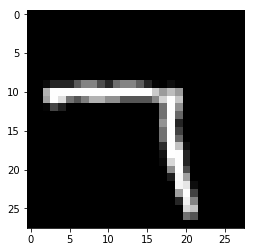

In [16]:
# Image at index indx
indx = 909
plt.imshow(testX[indx].numpy(), cmap='gray')

In [17]:
# Label at index indx
print(preds[indx].item())

7


In [18]:
a3 = model.fc3(model.sigmoid2(model.fc2(model.sigmoid1(model.fc1(testX.view(-1, 28*28).cuda())))))

In [19]:
a3.size()

torch.Size([10000, 300])

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)

In [22]:
reduced_a3 = pca.fit_transform(a3.cpu().detach().numpy())

In [23]:
reduced_a3[0]

array([16.45896  ,  4.0052376], dtype=float32)

In [24]:
np_a3 = np.array(reduced_a3)

In [25]:
np_a3.shape

(10000, 2)

In [26]:
colors = ['red','green','blue','purple', 'orange', 'cyan', 'brown', 'black', 'yellow', 'pink']
for i in range(10):
    print(i, colors[i])

0 red
1 green
2 blue
3 purple
4 orange
5 cyan
6 brown
7 black
8 yellow
9 pink


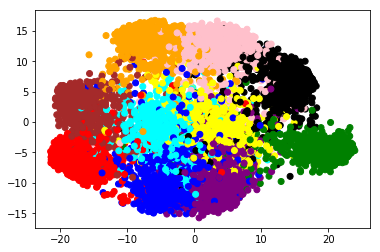

In [27]:
plt.scatter(np_a3[:,0], np_a3[:,1], c=testY, cmap=matplotlib.colors.ListedColormap(colors))